In [1]:
import 定日镜光学效率 as eff
import pandas as pd
import numpy as np
import test_multi
import e_mirror_rate as emr

In [2]:
#读取 附件.xlsx 中的数据
df = pd.read_excel('附件.xlsx',header=0)
df.head()

,x坐标 (m),y坐标 (m)
0,107.250,11.664
1,105.360,23.191
2,102.235,34.447
3,97.911,45.299
4,92.440,55.619


In [3]:
#加入额外数据
#安装高度
df['安装高度z'] = 4
#尺寸
df['尺寸长l'] = 6
df['尺寸宽w'] = 6

df.head()

,x坐标 (m),y坐标 (m),安装高度z,尺寸长l,尺寸宽w
0,107.250,11.664,4,6,6
1,105.360,23.191,4,6,6
2,102.235,34.447,4,6,6
3,97.911,45.299,4,6,6
4,92.440,55.619,4,6,6


In [4]:
#转换为nddarray
mirrors = df.values
mirrors

array([[107.25 ,  11.664,   4.   ,   6.   ,   6.   ],
       [105.36 ,  23.191,   4.   ,   6.   ,   6.   ],
       [102.235,  34.447,   4.   ,   6.   ,   6.   ],
       ...,
       [334.636, -40.95 ,   4.   ,   6.   ,   6.   ],
       [336.233, -24.609,   4.   ,   6.   ,   6.   ],
       [337.032,  -8.21 ,   4.   ,   6.   ,   6.   ]])

## 计算效率

In [5]:

result_matrix = test_multi.range_result(mirrors[:, 0:2],8)
#print(result_matrix)

In [6]:

Day=90
hour=9
phi=39.2*np.pi/180

ps,tal,per=eff.E_field(mirrors,result_matrix,Day,hour,phi,3)

print("总功率",tal)
print("单位面积功率",per)


points [[-1.11953154  4.68168108]
 [-3.54807872 -2.02577802]
 [ 1.11953154 -4.68168108]
 [ 3.54807872  2.02577802]]
第 0 个镜子效率: {'eta': 0.7537018704070388, 'eta_cos': 0.888334120714491, 'eta_at': 0.9780340506043553, 'eta_trunc': 0.9429343284311682, 'eta_sb': 1.0}
points [[-1.66865979  4.5144554 ]
 [-3.564689   -2.44708807]
 [ 1.66865979 -4.5144554 ]
 [ 3.564689    2.44708807]]
第 1 个镜子效率: {'eta': 0.764038257166511, 'eta_cos': 0.8949845302444829, 'eta_at': 0.9780340758651301, 'eta_trunc': 0.9487630507374828, 'eta_sb': 1.0}
points [[-2.16970691  4.28498951]
 [-3.48043109 -2.86273503]
 [ 2.16970691 -4.28498951]
 [ 3.48043109  2.86273503]]
第 2 个镜子效率: {'eta': 0.7785950790860522, 'eta_cos': 0.9014307816956874, 'eta_at': 0.9780340592760167, 'eta_trunc': 0.9599253572269669, 'eta_sb': 1.0}
points [[-2.61113838  4.00005174]
 [-3.29649246 -3.26122928]
 [ 2.61113838 -4.00005174]
 [ 3.29649246  3.26122928]]
第 3 个镜子效率: {'eta': 0.7938272589829601, 'eta_cos': 0.9076026371410562, 'eta_at': 0.978034071077

d:\python code\23cmfsh\ColumnProjection.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(plane_vector[1]/plane_vector[0])


points [[ 2.77668465  3.4424778 ]
 [-0.89661564 -0.52323686]
 [-2.77668465 -3.4424778 ]
 [ 0.89661564  0.52323686]]
第 260 个镜子效率: {'eta': 0.6591197950667559, 'eta_cos': 0.8067110627506934, 'eta_at': 0.9741563870344978, 'eta_trunc': 0.9116535606192075, 'eta_sb': 1.0}
points [[ 2.42363403  3.64383743]
 [-1.34776691 -0.61960921]
 [-2.42363403 -3.64383743]
 [ 1.34776691  0.61960921]]
第 261 个镜子效率: {'eta': 0.701081592155383, 'eta_cos': 0.8117927471997183, 'eta_at': 0.9741563831607305, 'eta_trunc': 0.9636224057047471, 'eta_sb': 1.0}
points [[ 2.03173012  3.81309978]
 [-1.76741982 -0.74201923]
 [-2.03173012 -3.81309978]
 [ 1.76741982  0.74201923]]
第 262 个镜子效率: {'eta': 0.7152452056180417, 'eta_cos': 0.8170829914391096, 'eta_at': 0.9741564475289998, 'eta_trunc': 0.9767248752755867, 'eta_sb': 1.0}
points [[ 1.60980359  3.94925594]
 [-2.15132361 -0.88774912]
 [-1.60980359 -3.94925594]
 [ 2.15132361  0.88774912]]
第 263 个镜子效率: {'eta': 0.7230599245771128, 'eta_cos': 0.8225425607845693, 'eta_at': 0.974

In [7]:

#找到功率最小的镜子
min_index = np.argmin(ps)
print("最小功率镜子",min_index,ps[min_index],mirrors[min_index])


最小功率镜子 1108 1.0905563468072548 [-236.053 -130.462    4.       6.       6.   ]


# 画图

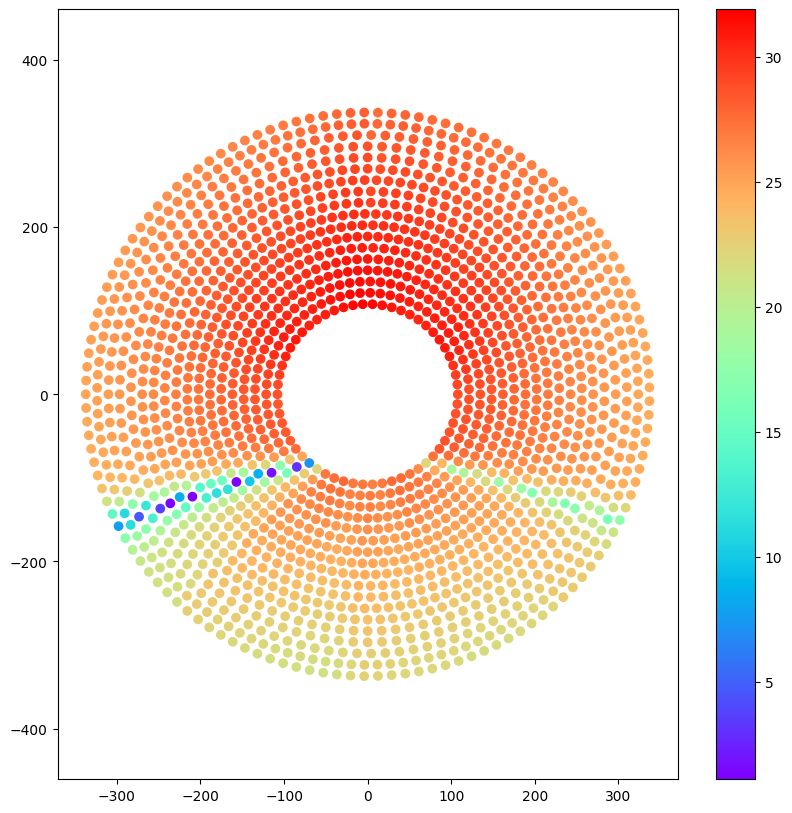

In [9]:
#import seaborn as sns
import matplotlib.pyplot as plt

#绘制功率密度图
#按镜子x,y坐标画出功率密度图
#x,y坐标
x = mirrors[:,0]
y = mirrors[:,1]
#功率密度
ps = ps
#绘图
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=ps,cmap='rainbow')
plt.colorbar()
#等比
plt.axis('equal')
plt.show()
